Link to the Kaggle project site:

https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling (Links to an external site.)Links to an external site.

Given a Bank customer, can we build a classifier which can determine whether they will leave or not using Neural networks?

 bank.csv View in a new window

The points distribution for this case is as follows:

Read the dataset
<b>

1) Drop the columns which are unique for all users like IDs (2.5 points)
    
2) Distinguish the feature and target set (2.5 points)</br>


3) Divide the data set into Train and test sets

4) Normalize the train and test data (2.5 points)

5) Initialize & build the model (10 points)

6) Optimize the model (5 points)

7) Predict the results using 0.5 as a threshold (5 points)

8) Print the Accuracy score and confusion matrix (2.5 points)</b>

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [98]:
df=pd.read_csv("bank.csv")

In [99]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Step 1--> Drop the columns which are unique for all users like IDs 

In [100]:
df=df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [102]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Step 2--> Distinguish the feature and target set

In [103]:
X=df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

In [104]:
y=df[['Exited']]

In [105]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.3+ KB


In [106]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
Exited    10000 non-null int64
dtypes: int64(1)
memory usage: 78.2 KB


## Before we divide the data into Test and Train lets take care of the Categorical variables

In [107]:
from pandas import get_dummies

In [108]:
X=get_dummies(X,columns=['Geography','Gender'],dtype='int64')

In [109]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


## To Avoid the dummy variable trap we will delete one Column from Geography and Gender

In [110]:
X=X.drop(['Geography_Spain','Gender_Female'], axis=1)

In [111]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0


In [112]:
X.rename(columns={'Geography_France':'France',
                          'Geography_Germany':'Other_countries',
                          'Gender_Male':'Gender'}, 
                 inplace=True)

In [113]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'France', 'Other_countries',
       'Gender'],
      dtype='object')

In [114]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
France             10000 non-null int64
Other_countries    10000 non-null int64
Gender             10000 non-null int64
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


## Lets Check if there is high correlation between independent variables

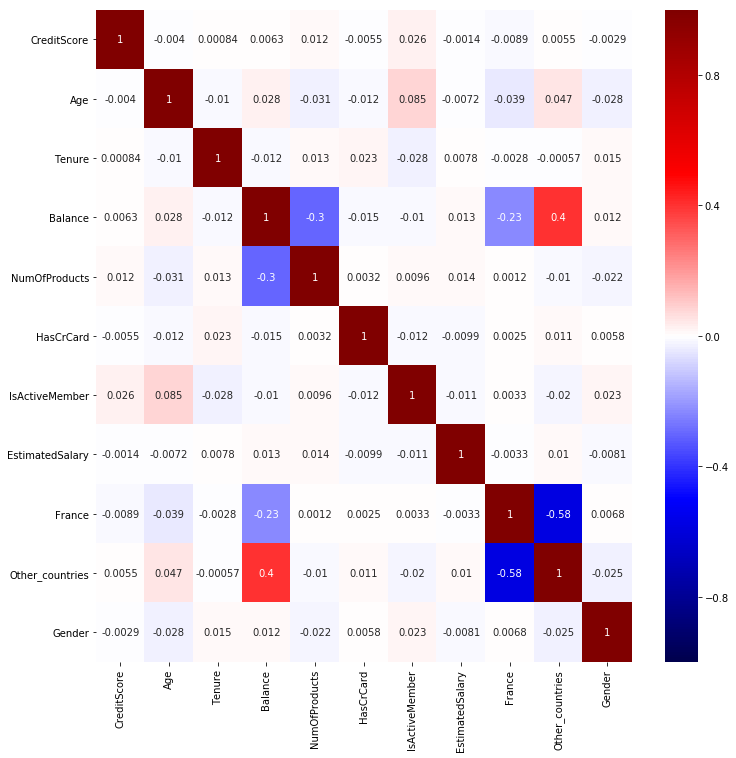

In [115]:
plt.subplots(figsize=(12,12))
sns.heatmap(X.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

##  Independent variables do not seem to have very high correlation except for Countries, as it has a very high negative relation
## as if its france it cannot be any other country and so on

## As we can see X is non-Null we do not have to worry about null/na values

## Step 3--> Divide the data set into Train and test sets

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [117]:
X_train.shape

(7000, 11)

In [118]:
X_test.shape

(3000, 11)

In [119]:
y_train.shape

(7000, 1)

In [120]:
y_test.shape

(3000, 1)

## Step 4--> Normalize the train and test data

In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [122]:
X_train_scaled=pd.DataFrame(X_train_scaled)

In [123]:
X_test_scaled=pd.DataFrame(X_test_scaled)

In [124]:
X_test_scaled.shape

(3000, 11)

In [125]:
X_test_scaled.shape

(3000, 11)

## Step 5--> Initialize & build the model 

In [126]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))



In [128]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train_scaled, y_train, batch_size = 10, nb_epoch = 100)


Epoch 1/100
7000/7000 [==============================] - 3s 383us/step - loss: 0.3425 - acc: 0.8564
Epoch 2/100
7000/7000 [==============================] - 1s 138us/step - loss: 0.3398 - acc: 0.8581
Epoch 3/100
7000/7000 [==============================] - 1s 137us/step - loss: 0.3417 - acc: 0.8579
Epoch 4/100
7000/7000 [==============================] - 1s 142us/step - loss: 0.3402 - acc: 0.8596
Epoch 5/100
7000/7000 [==============================] - 1s 136us/step - loss: 0.3415 - acc: 0.8573
Epoch 6/100
7000/7000 [==============================] - 1s 139us/step - loss: 0.3414 - acc: 0.8570
Epoch 7/100
7000/7000 [==============================] - 1s 157us/step - loss: 0.3410 - acc: 0.8581
Epoch 8/100
7000/7000 [==============================] - 1s 144us/step - loss: 0.3408 - acc: 0.8586
Epoch 9/100
7000/7000 [==============================] - 1s 136us/step - loss: 0.3400 - acc: 0.8589
Epoch 10/100
7000/7000 [==============================] - 1s 135us/step - loss: 0.3409 - acc: 0.8564

7000/7000 [==============================] - 1s 136us/step - loss: 0.3385 - acc: 0.8581
Epoch 82/100
7000/7000 [==============================] - 1s 141us/step - loss: 0.3387 - acc: 0.8577
Epoch 83/100
7000/7000 [==============================] - 1s 140us/step - loss: 0.3379 - acc: 0.8591
Epoch 84/100
7000/7000 [==============================] - 1s 136us/step - loss: 0.3380 - acc: 0.8561
Epoch 85/100
7000/7000 [==============================] - 1s 132us/step - loss: 0.3374 - acc: 0.8587
Epoch 86/100
7000/7000 [==============================] - 1s 137us/step - loss: 0.3378 - acc: 0.8590
Epoch 87/100
7000/7000 [==============================] - 1s 136us/step - loss: 0.3379 - acc: 0.8581
Epoch 88/100
7000/7000 [==============================] - 1s 140us/step - loss: 0.3385 - acc: 0.8579
Epoch 89/100
7000/7000 [==============================] - 1s 134us/step - loss: 0.3380 - acc: 0.8569
Epoch 90/100
7000/7000 [==============================] - 1s 133us/step - loss: 0.3378 - acc: 0.8600
Epo

In [129]:
y_pred = classifier.predict(X_test_scaled)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [130]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm_1 = confusion_matrix(y_test, y_pred)

In [131]:
cm_1

array([[2315,  101],
       [ 302,  282]], dtype=int64)

In [132]:
accuracy_score(y_test,y_pred)

0.8656666666666667

# We can see we are able to get an 86.56 % accuracy with 2 hidden layers having 6 output _dims

## Step 6 --> Optimize the model

In [133]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.02)


In [134]:
# Initialising the ANN
classifier2 = Sequential()

# Adding the input layer and the first hidden layer
classifier2.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier2.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier2.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier2.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier2.fit(X_train_scaled, y_train, batch_size = 10, nb_epoch = 150)


Epoch 1/150
7000/7000 [==============================] - 2s 249us/step - loss: 0.5673 - acc: 0.7911
Epoch 2/150
7000/7000 [==============================] - 1s 134us/step - loss: 0.5146 - acc: 0.7924
Epoch 3/150
7000/7000 [==============================] - 1s 132us/step - loss: 0.5112 - acc: 0.7924
Epoch 4/150
7000/7000 [==============================] - ETA: 0s - loss: 0.5107 - acc: 0.792 - 1s 133us/step - loss: 0.5108 - acc: 0.7924
Epoch 5/150
7000/7000 [==============================] - 1s 131us/step - loss: 0.5108 - acc: 0.7924
Epoch 6/150
7000/7000 [==============================] - 1s 135us/step - loss: 0.5107 - acc: 0.7924
Epoch 7/150
7000/7000 [==============================] - 1s 135us/step - loss: 0.5108 - acc: 0.7924
Epoch 8/150
7000/7000 [==============================] - 1s 135us/step - loss: 0.5107 - acc: 0.7924
Epoch 9/150
7000/7000 [==============================] - 1s 139us/step - loss: 0.5108 - acc: 0.7924
Epoch 10/150
7000/7000 [==============================] - 1s 1

7000/7000 [==============================] - 1s 144us/step - loss: 0.3430 - acc: 0.8601
Epoch 82/150
7000/7000 [==============================] - 1s 138us/step - loss: 0.3429 - acc: 0.8571
Epoch 83/150
7000/7000 [==============================] - 1s 134us/step - loss: 0.3421 - acc: 0.8570
Epoch 84/150
7000/7000 [==============================] - 1s 136us/step - loss: 0.3422 - acc: 0.8586
Epoch 85/150
7000/7000 [==============================] - 1s 139us/step - loss: 0.3416 - acc: 0.8580
Epoch 86/150
7000/7000 [==============================] - 1s 131us/step - loss: 0.3422 - acc: 0.8624
Epoch 87/150
7000/7000 [==============================] - 1s 134us/step - loss: 0.3430 - acc: 0.8589
Epoch 88/150
7000/7000 [==============================] - 1s 132us/step - loss: 0.3420 - acc: 0.8576
Epoch 89/150
7000/7000 [==============================] - 1s 131us/step - loss: 0.3417 - acc: 0.8573
Epoch 90/150
7000/7000 [==============================] - 1s 130us/step - loss: 0.3419 - acc: 0.8596
Epo

In [135]:
y_pred = classifier2.predict(X_test_scaled)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [136]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm_2 = confusion_matrix(y_test, y_pred)
cm_2

array([[2323,   93],
       [ 307,  277]], dtype=int64)

In [137]:
accuracy_score(y_test,y_pred)

0.8666666666666667

## By changing the optimizer to Stochastic Gradient Descent and changing the learning rate we were able to achieve an a better accuracy score of 86.67%

In [139]:
from keras import optimizers


Adadelta=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)


In [140]:
# Initialising the ANN
classifier3 = Sequential()

# Adding the input layer and the first hidden layer
classifier3.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier3.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier3.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier3.compile(optimizer = 'Adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier3.fit(X_train_scaled, y_train, batch_size = 10, nb_epoch = 150)


Epoch 1/150
7000/7000 [==============================] - 2s 260us/step - loss: 0.4592 - acc: 0.7921
Epoch 2/150
7000/7000 [==============================] - 1s 144us/step - loss: 0.4234 - acc: 0.8161
Epoch 3/150
7000/7000 [==============================] - 1s 144us/step - loss: 0.4173 - acc: 0.8297
Epoch 4/150
7000/7000 [==============================] - 1s 143us/step - loss: 0.4133 - acc: 0.8303
Epoch 5/150
7000/7000 [==============================] - 1s 145us/step - loss: 0.4104 - acc: 0.8316
Epoch 6/150
7000/7000 [==============================] - 1s 145us/step - loss: 0.4085 - acc: 0.8331
Epoch 7/150
7000/7000 [==============================] - 1s 143us/step - loss: 0.4064 - acc: 0.8309
Epoch 8/150
7000/7000 [==============================] - 1s 144us/step - loss: 0.4055 - acc: 0.8320
Epoch 9/150
7000/7000 [==============================] - 1s 144us/step - loss: 0.4049 - acc: 0.8317
Epoch 10/150
7000/7000 [==============================] - 1s 143us/step - loss: 0.4041 - acc: 0.8317

7000/7000 [==============================] - 1s 144us/step - loss: 0.3411 - acc: 0.8586
Epoch 83/150
7000/7000 [==============================] - 1s 144us/step - loss: 0.3401 - acc: 0.8586
Epoch 84/150
7000/7000 [==============================] - 1s 146us/step - loss: 0.3411 - acc: 0.8587
Epoch 85/150
7000/7000 [==============================] - 1s 145us/step - loss: 0.3402 - acc: 0.8619
Epoch 86/150
7000/7000 [==============================] - 1s 144us/step - loss: 0.3407 - acc: 0.8591
Epoch 87/150
7000/7000 [==============================] - 1s 143us/step - loss: 0.3403 - acc: 0.8613
Epoch 88/150
7000/7000 [==============================] - 1s 145us/step - loss: 0.3403 - acc: 0.8601
Epoch 89/150
7000/7000 [==============================] - 1s 142us/step - loss: 0.3405 - acc: 0.8603
Epoch 90/150
7000/7000 [==============================] - 1s 146us/step - loss: 0.3402 - acc: 0.8607
Epoch 91/150
7000/7000 [==============================] - 1s 147us/step - loss: 0.3399 - acc: 0.8591
Epo

## Even after changing the optimizer to Adadelta we were able to achieve a similar accuracy score of 86% hence  we will now proceed to test the predictions

## Step 7--> Predict the results using 0.5 as a threshold

In [141]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier3.predict(X_test_scaled)
y_pred = (y_pred > 0.5)


In [142]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

## Step 8-->Print the Accuracy score and confusion matrix

In [143]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [144]:
cm

array([[2327,   89],
       [ 312,  272]], dtype=int64)

## Confusion Matrix Using Adadelta Optimizer

In [148]:
cm_1

array([[2315,  101],
       [ 302,  282]], dtype=int64)

##  Confusion Matrix using Adam Optimizer

In [150]:
cm_2

array([[2323,   93],
       [ 307,  277]], dtype=int64)

## Confusion Matrix Using Stochastic Gradient Optimizer

In [145]:
(1470+235)/2000*100

85.25

In [146]:
accuracy_score(y_test,y_pred)

0.8663333333333333

# We have the following accuracy scores
## 1) 86.55% using Adam Optimizer
## 2) 86.67% Using Stochastic Gradient Optimizer
## 3) 86.33% using Adadelta Optimizer

# Overall we get the best results using Stochastic Gradient Optimizer for this example